# Data Science

We will train 4 different models in 2 experiments, and for each on eadjuste hiperparameters. Also, we will load every run into mlflow.

**Models**
* Logistic Regression
* Random Forest Classifier
* XGBoost Classifier
* KNN Classifier

Eliminar 7 commits previos

>> git reset --soft HEAD~7

### Libraries

In [1]:
from datetime import datetime
from pprint import pprint

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from mlflow.models import infer_signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    accuracy_score,
    average_precision_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    ParameterSampler,
    RandomizedSearchCV,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


### Load data

In [ ]:
# Comment once you run this line
%load_ext kedro.ipython
#%reload_kedro

[06/08/25 01:59:47] INFO     Using 'c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo               __init__.py:272
                             semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\kedro\f                
                             ramework\project\rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: c:\Users\Esteban\Documents\. Clases_Tec\8.   __init__.py:180
                             Octavo semestre\_Proyecto\kProject\tcaproject.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


[06/08/25 01:59:49] INFO     Registering new custom resolver: 'km.random_name'                    mlflow_hook.py:65

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            kedro_mlflow_config.py:293
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Esteban/Documents/.%20Clases_Tec/8.%20Oct                           
                             avo%20semestre/_Proyecto/kProject/tcaproject/mlruns'                                  

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[06/08/25 01:59:50] INFO     Kedro project tcaProject                                               __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:153

In [ ]:
df_exp1 = catalog.load("reservaciones_exp1") # type: ignore # noqa: F821
df_exp2 = catalog.load("reservaciones_exp2") # type: ignore # noqa: F821

                    INFO     Loading data from reservaciones_exp1 (ParquetDataset)...           data_catalog.py:403

                    INFO     Loading data from reservaciones_exp2 (ParquetDataset)...           data_catalog.py:403

### EDA

In [ ]:
df_exp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202491 entries, 0 to 203001
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   numero_personas                202491 non-null  float64
 1   numero_adultos                 202491 non-null  float64
 2   numero_menores                 202491 non-null  float64
 3   numero_noches                  202491 non-null  float64
 4   total_habitaciones             202491 non-null  float64
 5   reservacion_pendiente          202491 non-null  float64
 6   total_tarifa                   202491 non-null  float64
 7   reservacion                    202491 non-null  float64
 8   cancelacion                    202491 non-null  float64
 9   dias_llegada-reservacion       202491 non-null  float64
 10  dias_salida-llegada            202491 non-null  float64
 11  nombre_agencia_te              202491 non-null  float64
 12  ciudad_agencia_te              2024

In [ ]:
df_exp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199813 entries, 0 to 203001
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nombre_paquete          199813 non-null  float64
 1   ciudad_agencia          199813 non-null  float64
 2   nombre_tipo_habitacion  199813 non-null  float64
 3   nombre_canal            199813 non-null  float64
 4   nombre_estado           199813 non-null  float64
 5   cancelacion             199813 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [ ]:
print(df_exp1.isna().sum().sum())
print(df_exp2.isna().sum().sum())

0
0


**Correlation plots**

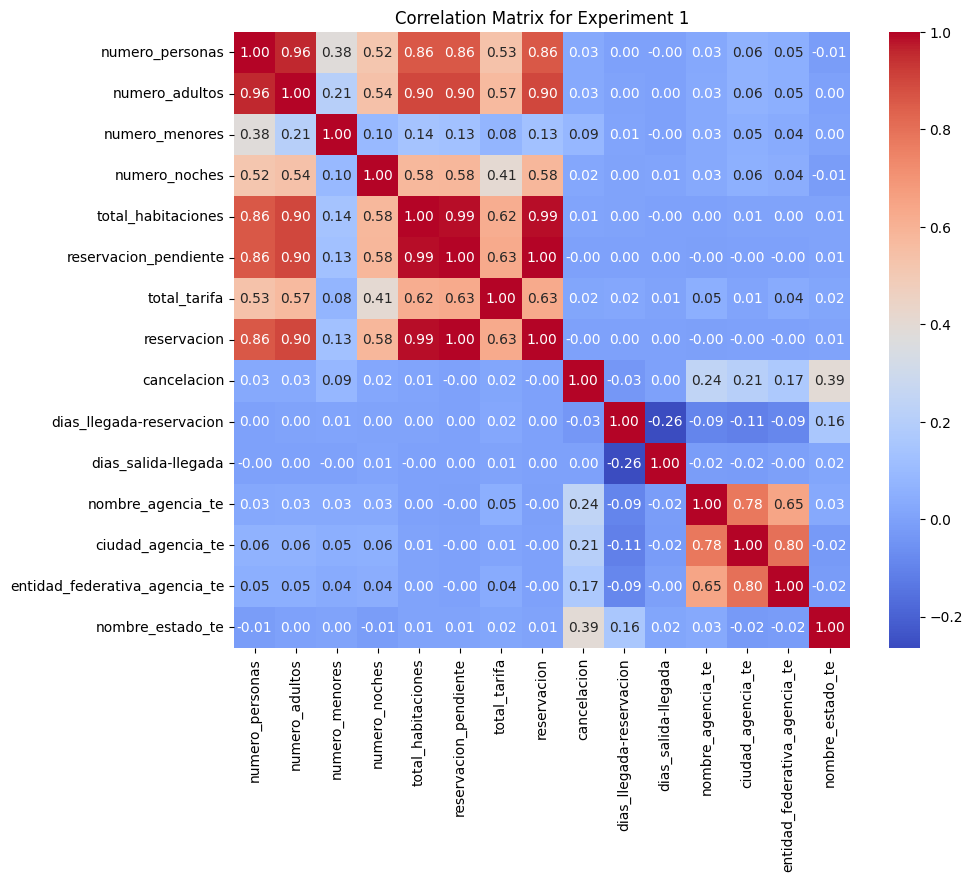

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_exp1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Experiment 1")
plt.show()

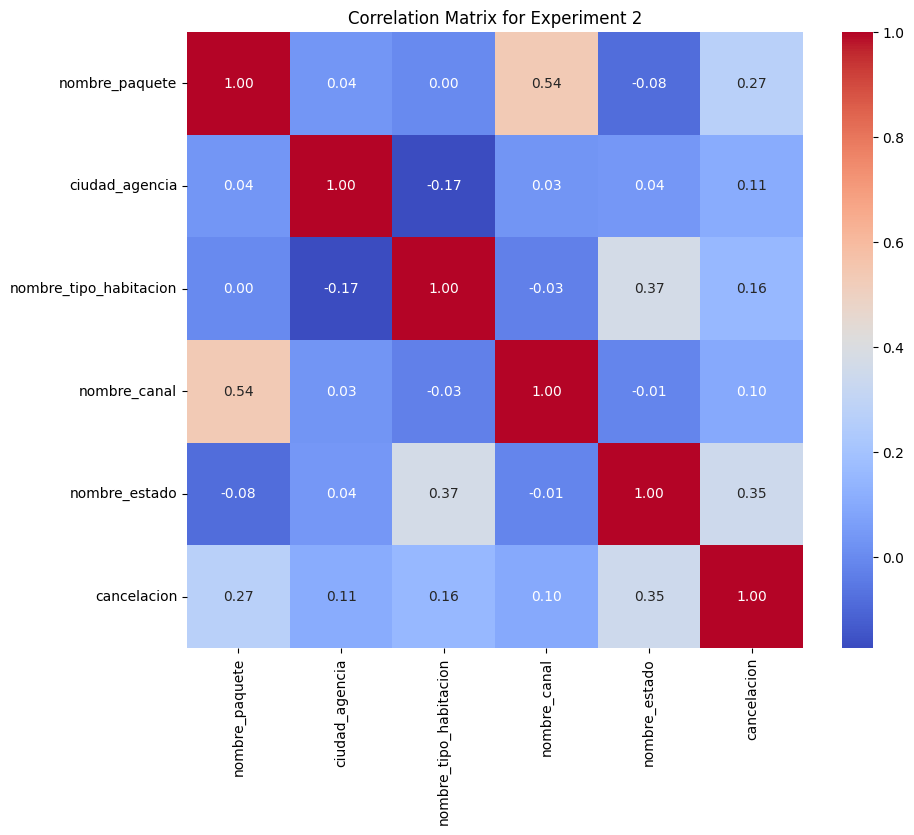

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_exp2.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Experiment 2")
plt.show()

**Violin plots**

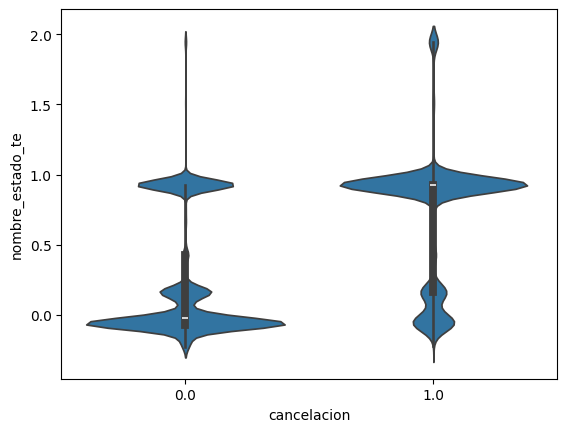

In [ ]:
# Violint plot for each variable by cancelation
plt.figure()
sns.violinplot(x="cancelacion", y="nombre_estado_te", data=df_exp1)
plt.show()

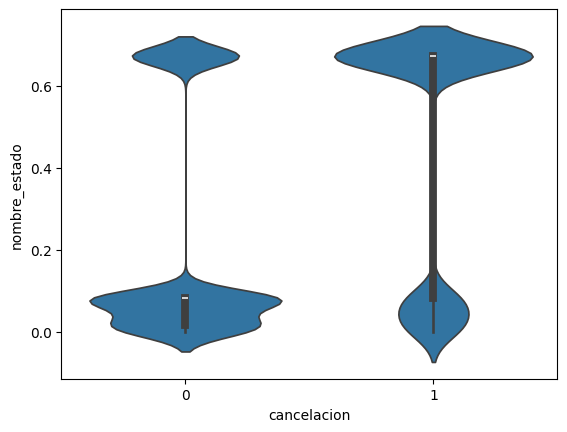

In [ ]:
# Violint plot for each variable by cancelation
plt.figure()
sns.violinplot(x="cancelacion", y="nombre_estado", data=df_exp2)
plt.show()

### Train models and log into MLflow

**Train model: Experiment1**

In [ ]:
# Define the target variable and independent variables
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
params = {
    'class_weight': 'balanced',
    'random_state': 42
    }

lr = LogisticRegression(**params)

lr.fit(X_train, y_train)

# Evaluation
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No Cancellation', 'Cancellation']))  # noqa: T201

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_scores = lr.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_scores)
accuracy = accuracy_score(y_test, y_pred)

                 precision    recall  f1-score   support

No Cancellation       0.95      0.79      0.86     33896
   Cancellation       0.42      0.77      0.54      6603

       accuracy                           0.79     40499
      macro avg       0.68      0.78      0.70     40499
   weighted avg       0.86      0.79      0.81     40499



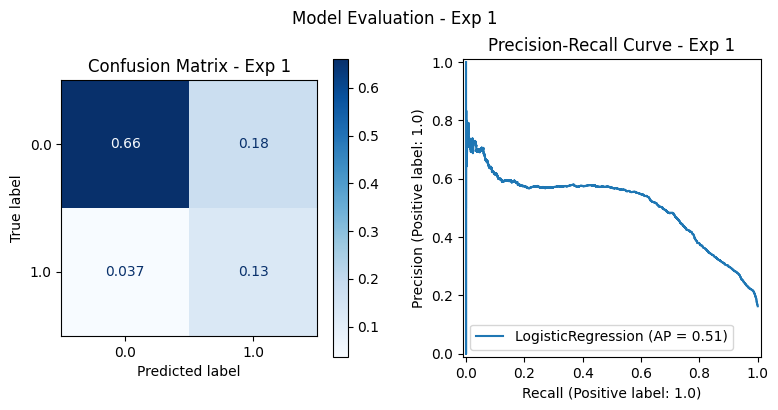

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize='all', cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix - Exp 1")

PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, ax=ax2)
ax2.set_title("Precision-Recall Curve - Exp 1")

plt.suptitle("Model Evaluation - Exp 1")

plt.tight_layout()  # Ajusta para que no se solapen los títulos

plt.savefig("model_evaluation_exp1.png")
plt.show()


**Log model: Experiment 1**

In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("Experiment 1")

# Start an MLflow run
with mlflow.start_run():
    # Log the dataset
    #mlflow.log_artifact(datasets.load_iris())

    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    metrics = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "average_precision": average_precision,
        "accuracy": accuracy
    }

    mlflow.log_metrics(metrics)

    # Log plots
    mlflow.log_artifact("model_evaluation_exp1.png")

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Info", "Basic Logistic Regression Model on reservaciones_exp1")
    mlflow.set_tag("Model Type", "Logistic Regression")
    mlflow.set_tag("Dataset", "reservaciones_exp1.parquet")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="reservaciones_exp1_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="reservaciones_exp1_model"
    )

c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Registered model 'reservaciones_exp1_model' already exists. Creating a new version of this model...
2025/06/08 02:00:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: reservaciones_exp1_model, version 5


🏃 View run smiling-snipe-107 at: http://127.0.0.1:5000/#/experiments/266921898870755520/runs/a51d0556129c4d1281e08a39555364fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/266921898870755520


Created version '5' of model 'reservaciones_exp1_model'.


**Train Model: Experment 2**

In [ ]:
# Define the target variable and independent variables
X = df_exp2.drop('cancelacion', axis=1)
y = df_exp2['cancelacion']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
params = {
    'class_weight': 'balanced',
    'random_state': 42
    }

lr = LogisticRegression(**params)

lr.fit(X_train, y_train)

# Evaluation
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No Cancellation', 'Cancellation']))  # noqa: T201

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_scores = lr.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_scores)
accuracy = accuracy_score(y_test, y_pred)

                 precision    recall  f1-score   support

No Cancellation       0.96      0.84      0.89     33219
   Cancellation       0.51      0.81      0.62      6744

       accuracy                           0.84     39963
      macro avg       0.73      0.82      0.76     39963
   weighted avg       0.88      0.84      0.85     39963



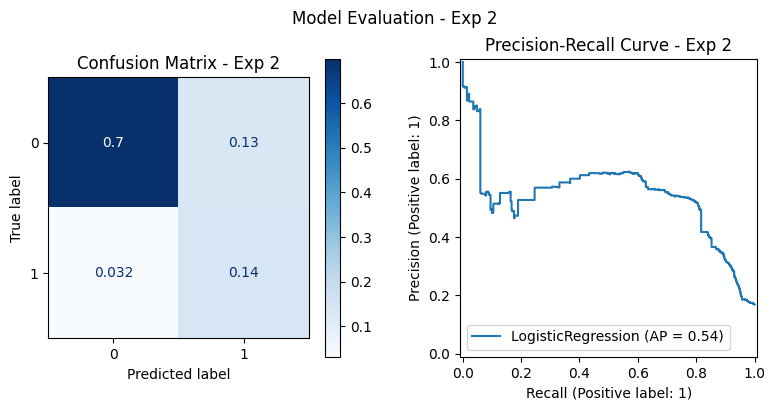

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize='all', cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix - Exp 2")

PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, ax=ax2)
ax2.set_title("Precision-Recall Curve - Exp 2")

plt.suptitle("Model Evaluation - Exp 2")

plt.tight_layout()  # Ajusta para que no se solapen los títulos

plt.savefig("model_evaluation_exp2.png")
plt.show()

**Log model: Experiment 2**

In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("Experiment 2")

# Start an MLflow run
with mlflow.start_run():
    # Log the dataset
    #mlflow.log_artifact(datasets.load_iris())

    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    metrics = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "average_precision": average_precision,
        "accuracy": accuracy
    }

    mlflow.log_metrics(metrics)

    # Log plots
    mlflow.log_artifact("model_evaluation_exp2.png")

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Info", "Basic Logistic Regression Model on reservaciones_exp2")
    mlflow.set_tag("Model Type", "Logistic Regression")
    mlflow.set_tag("Dataset", "reservaciones_exp2.parquet")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="reservaciones_exp2_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="reservaciones_exp2_model"
    )

Registered model 'reservaciones_exp2_model' already exists. Creating a new version of this model...
2025/06/08 02:00:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: reservaciones_exp2_model, version 4


🏃 View run marvelous-hound-549 at: http://127.0.0.1:5000/#/experiments/629235308783576235/runs/681af94ceb5b4d27b74af1b1aeb58310
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/629235308783576235


Created version '4' of model 'reservaciones_exp2_model'.


### Models training and hyperparameters tuning

In [ ]:
np.random.seed(42)

#### Experiment 1

**Logistic Regression**

In [ ]:
# Logistics regression params from parameters_data_science.yml
mlflow.set_experiment("Experiment 1")
run_name_prefix = f"RandomSearch_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Define the target variable and independent variables
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Espacio de búsqueda válido agrupado por compatibilidad solver-penalty
param_dist = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'penalty': ['l2', None],
        'C': [0.01, 0.1, 1, 5, 10],
        'class_weight': ['balanced', None],
        'max_iter': [100, 200, 300, 400, 500]
    },
    {
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 5, 10],
        'class_weight': ['balanced', None],
        'max_iter': [100, 200, 300, 400, 500]
    },
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.7, 0.9],
        'C': [0.01, 0.1, 1, 5, 10],
        'class_weight': ['balanced', None],
        'max_iter': [100, 200, 300, 400, 500]
    }
]

# Para RandomizedSearchCV, combinamos los espacios y muestreamos n_iter combinaciones
n_iter = 10
param_list = []
for param_group in param_dist:
    param_list.extend(list(ParameterSampler(param_group, n_iter=n_iter, random_state=42)))

# Limitamos a n_iter combinaciones totales
param_list = param_list[:n_iter]

best_score_lr = -np.inf
best_params_lr = None

for i, params in enumerate(param_list):
    with mlflow.start_run(run_name=f"{run_name_prefix}_run_{i+1}"):
        # Entrena el modelo con los parámetros actuales
        model = LogisticRegression(**params)
        model.fit(X_train, y_train)

        # Log metrics
        y_pred = model.predict(X_test)

        metrics = {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "average_precision": average_precision_score(y_test, model.predict_proba(X_test)[:, 1])
        }

        mlflow.log_metrics(metrics)

        # Log parameters
        mlflow.log_params(params)

        # Log tags
        mlflow.set_tag("Model Type", "Logistic Regression")
        mlflow.set_tag("Run Type", "Hyperparameter Tuning")

        # Loguea el modelo con firma e input_example para trazabilidad
        from mlflow.models import infer_signature
        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train.head(5)
        )

        # Actualiza mejor resultado
        if recall > best_score_lr:
            best_score_lr = recall
            best_params_lr = params




In [ ]:
print("Mejores parámetros:", best_params_lr)  # noqa: T201
print("Mejor recall:", best_score_lr) # noqa: T201

Mejores parámetros: {'solver': 'sag', 'penalty': None, 'max_iter': 400, 'class_weight': 'balanced', 'C': 5}
Mejor recall: 0.8096085409252669


**Random Forest**

In [ ]:
mlflow.set_experiment("Experiment 1")
run_name_prefix = f"RandomSearch_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Define features and target
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Espacio de búsqueda para Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

n_iter = 2
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

best_score_rf = -np.inf
best_params_rf = None

for i, params in enumerate(param_list):
    with mlflow.start_run(run_name=f"{run_name_prefix}_run_{i+1}"):
        # Entrena el modelo con los parámetros actuales
        model = RandomForestClassifier(**params, random_state=42)
        model.fit(X_train, y_train)

        # Predicciones y cálculo de métricas
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        metrics = {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "average_precision": average_precision_score(y_test, y_proba)
        }

        # Loguea métricas y parámetros
        mlflow.log_metrics(metrics)
        mlflow.log_params(params)

        # Log tags
        mlflow.set_tag("Model Type", "Random Forest")
        mlflow.set_tag("Run Type", "Hyperparameter Tuning")

        # Loguea el modelo con firma e input_example para trazabilidad
        from mlflow.models import infer_signature
        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train.head(5)
        )

        # Actualiza mejor resultado basado en recall
        if metrics["recall"] > best_score_rf:
            best_score_rf = metrics["recall"]
            best_params_rf = params


In [ ]:
print("Mejores parámetros:", best_params_rf) # noqa: T201
print("Mejor recall:", best_score_rf) # noqa: T201

Mejores parámetros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced_subsample', 'bootstrap': True}
Mejor recall: 0.9121611388762684


**XGBoos**

In [ ]:
mlflow.set_experiment("Experiment 1")
run_name_prefix = f"RandomSearch_XGB_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Define features and target
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Espacio de búsqueda típico para XGBClassifier
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 3, 5],  # útil para clases desbalanceadas
    'objective': ['binary:logistic'],
    'use_label_encoder': [False],
    'eval_metric': ['logloss']  # para evitar warning en XGBoost >1.3
}

n_iter = 10
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

best_score_xgb = -np.inf
best_params_xgb = None

for i, params in enumerate(param_list):
    with mlflow.start_run(run_name=f"{run_name_prefix}_run_{i+1}"):
        # Crea el modelo con los parámetros actuales
        model = XGBClassifier(**params, random_state=42, verbosity=0)
        model.fit(X_train, y_train)

        # Predicciones y métricas
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        metrics = {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "average_precision": average_precision_score(y_test, y_proba)
        }

        # Loguea métricas y parámetros
        mlflow.log_metrics(metrics)
        mlflow.log_params(params)

        # Log tags
        mlflow.set_tag("Model Type", "XGBoost Classifier")
        mlflow.set_tag("Run Type", "Hyperparameter Tuning")

        # Loguea el modelo con firma e input_example para trazabilidad
        from mlflow.models import infer_signature
        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.xgboost.log_model(
            xgb_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train.head(5)
        )

        # Actualiza mejor resultado basado en recall
        if metrics["recall"] > best_score_xgb:
            best_score_xgb = metrics["recall"]
            best_params_xgb = params


In [ ]:
print("Mejores parámetros:", best_params_xgb) # noqa: T201
print("Mejor recall:", best_score_xgb) # noqa: T201

Mejores parámetros: {'use_label_encoder': False, 'subsample': 0.8, 'scale_pos_weight': 5, 'reg_lambda': 2, 'reg_alpha': 0, 'objective': 'binary:logistic', 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.3, 'eval_metric': 'logloss', 'colsample_bytree': 0.6}
Mejor recall: 0.8953505982129335


**KNN Classifier**

In [ ]:
mlflow.set_experiment("Experiment 1")
run_name_prefix = f"RandomSearch_KNN_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Define features and target
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Espacio de búsqueda típico para KNN
param_dist = {
    'n_neighbors': list(range(1, 31)),          # Número de vecinos
    'weights': ['uniform', 'distance'],         # Ponderación de los vecinos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para búsqueda
    'p': [1, 2]                                 # Parámetro para la distancia (1=Manhattan, 2=Euclidiana)
}

n_iter = 10
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

best_score_knn = -np.inf
best_params_knn = None

for i, params in enumerate(param_list):
    with mlflow.start_run(run_name=f"{run_name_prefix}_run_{i+1}"):
        model = KNeighborsClassifier(**params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # KNN no tiene método predict_proba para algunos casos, así que evitamos average_precision si no está disponible
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            avg_prec = average_precision_score(y_test, y_proba)
        except AttributeError:
            avg_prec = None

        metrics = {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
        }
        if avg_prec is not None:
            metrics["average_precision"] = avg_prec

        mlflow.log_metrics(metrics)
        mlflow.log_params(params)

        mlflow.set_tag("Model Type", "KNeighborsClassifier")
        mlflow.set_tag("Run Type", "Hyperparameter Tuning")

        from mlflow.models import infer_signature
        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train.head(5)
        )

        if metrics["recall"] > best_score_knn:
            best_score_knn = metrics["recall"]
            best_params_knn = params


In [ ]:
print("Mejores parámetros:", best_params_knn) # noqa: T201
print("Mejor recall:", best_score_knn) # noqa: T201
